Exploring The Data


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Mount Drive

Reading Dataset


In [74]:
dataset =  pd.read_csv('https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv', sep='\t')
dataset = dataset.dropna()
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [75]:
dataset.shape

(156060, 4)

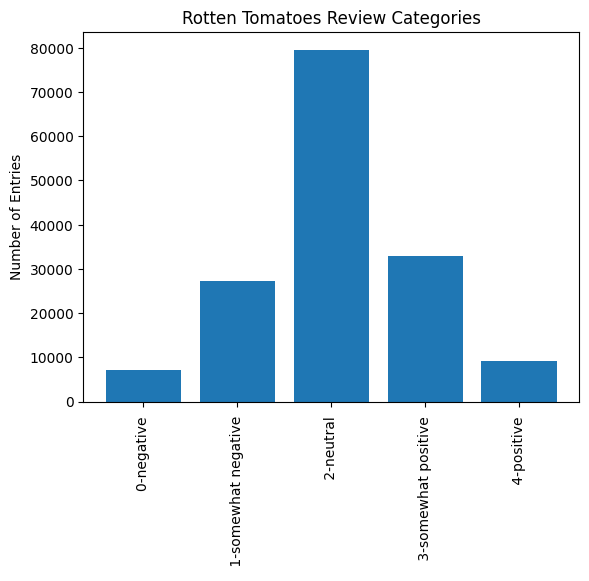

In [76]:

d = dict(dataset.Sentiment.value_counts())
fields = ('0-negative ', ' 1-somewhat negative ', ' 2-neutral ', ' 3-somewhat positive ', ' 4-positive ')
y_pos = np.arange(len(fields))
performance = [d[0],d[1],d[2],d[3],d[4]]
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, fields, rotation='vertical')
plt.ylabel('Number of Entries')
plt.title('Rotten Tomatoes Review Categories')
plt.show()



Adjustable Parameters

In [0]:
import re
import nltk 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()
def remove_punctuation(text):
  txt_nonpunct = "".join([a for a in text if a not in string.punctuation])
  return txt_nonpunct 
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens 
def remove_stopwords(txt_tokenized):
  txt_clean = [word for word in txt_tokenized if word not in stopwords]
  return txt_clean
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text
def lemmatization(token_txt):
  text = [wn.lemmatize(word) for word in token_txt]
  return text


Data Cleaning | Punctuations

In [0]:
stopwords = nltk.corpus.stopwords.words('english')
dataset['Phrase'] = dataset['Phrase'].apply(lambda x: remove_punctuation(x)) 
dataset['Phrase'] = dataset['Phrase'].apply(lambda x: tokenize(x.lower()))
dataset['Phrase'] = dataset['Phrase'].apply(lambda x: remove_stopwords(x))
dataset['Phrase'] = dataset['Phrase'].apply(lambda x: stemming(x))
dataset['Phrase'] = dataset['Phrase'].apply(lambda x: lemmatization(x))

Data Cleaning | Tokenization

In [79]:
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"[seri, escapad, demonstr, adag, good, goo, als...",1
1,2,1,"[seri, escapad, demonstr, adag, good, goo]",2
2,3,1,[seri],2
3,4,1,[],2
4,5,1,[seri],2


Splitting The Dataset

In [80]:

X_train, X_test, Y_train, Y_test = train_test_split(dataset['Phrase'], dataset['Sentiment'], test_size=0.3, random_state=2003)
documents = []
X_train = np.array(X_train.values.tolist())
Y_train = np.array(Y_train.values.tolist())
for i in range(len(X_train)):
  documents.append([list(X_train[i]), Y_train[i]]) 

X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())
for i in range(len(X_test)):
  documents.append([list(X_test[i]), Y_test[i]]) 
dataset = pd.DataFrame(documents, columns=['text', 'sentiment']) 
dataset['join'] = dataset.text.apply(' '.join)
dataset.head()

,text,sentiment,join
0,[age],2,age
1,"[gorgeou, epic]",4,gorgeou epic
2,"[fan, grossout, comedi]",2,fan grossout comedi
3,"[filmmak, ascend, liter, olympu, art, world]",4,filmmak ascend liter olympu art world
4,"[twist, mysteri]",2,twist mysteri


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset['join'],  dataset['sentiment'], test_size=0.3, random_state=2003)

In [0]:
 from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 2500)
X = vectorizer.fit_transform(dataset["join"])
Y = dataset['sentiment']
X_train = vectorizer.transform(X_train).toarray()
Y_train = Y_train 
X_test = vectorizer.transform(X_test).toarray()
Y_test = Y_test

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy

In [0]:
batch_size = 64
num_classes = 5
epochs = 20

In [0]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [86]:
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=1,
                  activation='relu',
                  input_shape=(2500,1)))
 model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
 model.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
 model.add(MaxPooling1D(pool_size=1))
 model.add(Dropout(rate = 0.1))
 model.add(Flatten())
 model.add(Dense(32, activation='relu'))
 model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 2500, 64)          128       
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 2500, 64)          4160      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 2500, 32)          2080      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2500, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2500, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy',f1_m,precision_m,recall_m])

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [90]:
import time
temp1 = time.time()
history = model.fit(X_train, Y_train,
          batch_size=64,
          epochs=20)
temp2 = time.time()


Epoch 1/20
109242/109242 [==============================] - 38s 346us/step - loss: 1.0702 - acc: 0.5819 - f1_m: 0.5154 - precision_m: 0.6242 - recall_m: 0.4437
Epoch 2/20
109242/109242 [==============================] - 37s 339us/step - loss: 0.9558 - acc: 0.6259 - f1_m: 0.5930 - precision_m: 0.6802 - recall_m: 0.5271
Epoch 3/20
109242/109242 [==============================] - 37s 341us/step - loss: 0.9236 - acc: 0.6424 - f1_m: 0.6131 - precision_m: 0.6898 - recall_m: 0.5529
Epoch 4/20
109242/109242 [==============================] - 37s 339us/step - loss: 0.9014 - acc: 0.6529 - f1_m: 0.6267 - precision_m: 0.6968 - recall_m: 0.5705
Epoch 5/20
109242/109242 [==============================] - 37s 337us/step - loss: 0.8817 - acc: 0.6627 - f1_m: 0.6389 - precision_m: 0.7021 - recall_m: 0.5871
Epoch 6/20
109242/109242 [==============================] - 37s 339us/step - loss: 0.8667 - acc: 0.6685 - f1_m: 0.6479 - precision_m: 0.7051 - recall_m: 0.6001
Epoch 7/20
109242/109242 [==============

In [91]:
print(f"Time taken to train the model {temp2-temp1} seconds")

Time taken to train the model 736.8436119556427 seconds


In [0]:
import keras 
model.save('1107736_1dconv_reg.h5')

# Recreate the exact same model purely from the file


In [0]:
model = keras.models.load_model('1107736_1dconv_reg.h5', 
                   custom_objects = {'f1_m': f1_m,  'precision_m': precision_m, 'recall_m' : recall_m})

In [94]:
loss, accuracy, f1_score, precision, recall= model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)
print(f'Test loss:{loss}, accuracy:{accuracy}, F-1 score:{f1_score}, Precision:{precision}, recall:{recall}')

Test loss:0.984531472721187, accuracy:0.6417189969797097, F-1 score:0.6308882864431394, Precision:0.6625389381202386, recall:0.6025460293202456


dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m'])


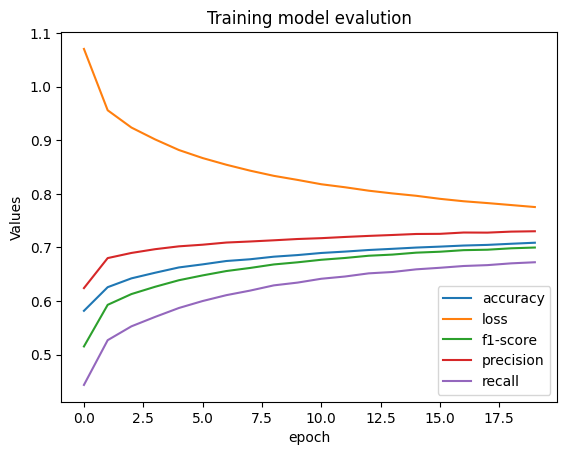

In [95]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['f1_m'])
plt.plot(history.history['precision_m'])
plt.plot(history.history['recall_m'])
plt.title('Training model evalution')
plt.ylabel('Values')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss','f1-score','precision','recall'], loc='lower right')
plt.show()